<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Custom_TensorFlow_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Custom TensorFlow Components**</center>

--> Use of **Functional API** instead of **Sequential API**

# **Building Custom Loss Function**

### **Building a Custom Loss Function with the Functional API:**

**Write a Custom Loss Function using Function API, that raises the difference b/w the predicions and actual values to the power of 4 i.e, Loss = (pred - actuals)^4**

In [ ]:
# import libraries
import tensorflow as tf

In [ ]:
# define a function to compute the loss
def custom_loss(y_true, y_pred):

  # compute loss values to the power of 4
  custom_loss = tf.math.pow(y_true - y_pred, 4)

  # return the loss value
  return custom_loss

Now, use it to compile the model:<br>

**--> model.compile(optimizer=optimizer, loss=custom_loss)**

### **Building a Custom Loss Function with the Subclassing API:**

**Write a Custom Loss Function using Subclassing API that raises the difference b/w the predicions and actual values to the power of 4 i.e, Loss = (pred - actuals)^4**

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:
# define the class that inherits from the keras Loss class
class myCustomLoss(keras.losses.Loss):

  # define constructor with threshold value =  1.0 and additional keywords
  def __init__(self, threshold=1.0, **kwargs):

    # pass additional keywords to the parent constructor
    super().__init__(**kwargs)

# use Call method to specify logic of the function to find loss
def call(self, y_true, y_pred):

  return tf.math.pow(y_true - y_pred, 4)

### **Building a Custom Loss Function to train a CNN Model to distinguish images of apples and tomatoes:**

Download the dataset to the colab folder:

In [ ]:
!wget "https://github.com/PacktWorkshops/The-TensorFlow-Workshop/blob/master/Chapter10/Datasets/apple-or-tomato.zip" -O "/content/apple-or-tomato.zip"

--2023-03-31 04:34:40--  https://github.com/PacktWorkshops/The-TensorFlow-Workshop/blob/master/Chapter10/Datasets/apple-or-tomato.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/apple-or-tomato.zip’

/content/apple-or-t     [ <=>                ] 137.07K  --.-KB/s    in 0.01s   

2023-03-31 04:34:40 (11.9 MB/s) - ‘/content/apple-or-tomato.zip’ saved [140355]



In [ ]:
# or, provide the option to upload the files from pc
from google.colab import files
uploaded = files.upload()

Saving apple-or-tomato.zip to apple-or-tomato.zip


In [ ]:
# unzip the dataset in the current folder
!unzip \*.zip

Archive:  apple-or-tomato.zip
   creating: apple-or-tomato/test_set/
   creating: apple-or-tomato/test_set/apple/
  inflating: apple-or-tomato/test_set/apple/apple (1).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (10).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (100).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (101).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (102).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (103).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (104).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (105).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (106).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (107).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (108).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (109).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (11).jpg  
  inflating: apple-or-tomato/test_set/apple/apple (110).jpg  
  inflating: apple-or-

In [ ]:
# create a variable that contains the path to the dataset
directory = "/content/apple-or-tomato"

In [ ]:
import pathlib

# create  the full path to dataset
path = pathlib.Path(directory)

Create a full path for training and validation data folders:

In [ ]:
train_dir = path / "training_set"
validation_dir = path / "test_set"

In [ ]:
# create a full paths to the apple and tomato folders for the train and vaidation sets
train_apple_dir = train_dir / "apple"
train_tomato_dir = train_dir / "tomato"

validation_apple_dir = validation_dir / "apple"
validation_tomato_dir = validation_dir / "tomato"

Get the total number of images for training and validation sets:

In [ ]:
import os

# get the total number of training images
total_train = len(os.listdir(train_apple_dir)) + len(os.listdir(train_tomato_dir))

# get the total number of testing images
total_val = len(os.listdir(validation_apple_dir)) + len(os.listdir(validation_tomato_dir))

Create the **Image Data Generator** that will rescale the images by dividing by 255:

In [ ]:
# import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#  initialize the ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# define batch_size, img_height and img_width
batch_size = 32
img_height, img_width = 224, 224

In [ ]:
# Create the Image Data Generator
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = validation_dir,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

Found 1300 images belonging to 2 classes.
Found 648 images belonging to 2 classes.


Using **for loop** to display 5 images from train_data_generator:

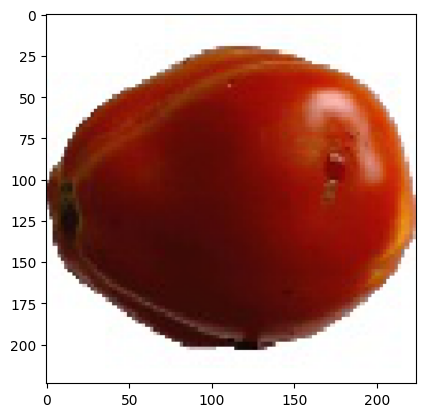

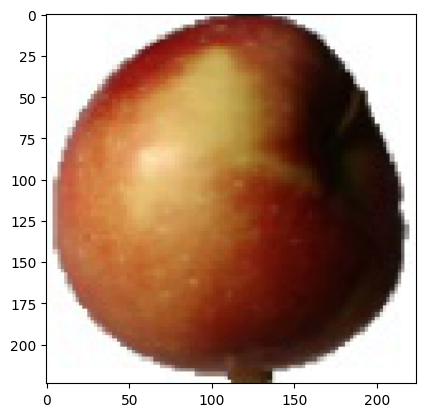

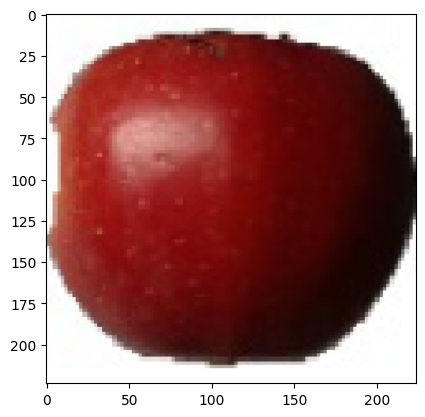

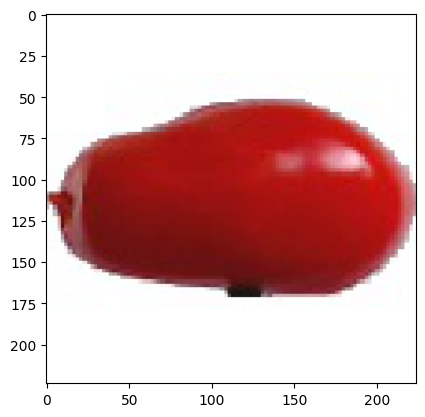

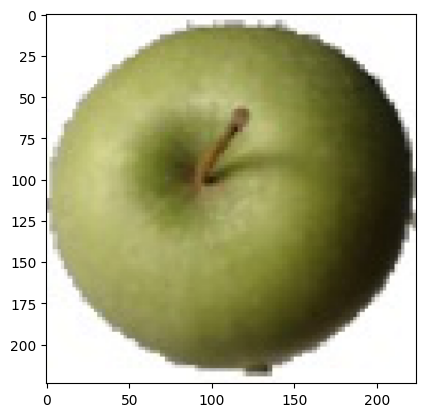

In [ ]:
import matplotlib.pyplot as plt

for _ in range(5):

  # get the next batch of training data and labels
  img, label = train_data_gen.next()

  plt.imshow(img[0])
  plt.show()

**Create a Custom Loss Function** that will square the calculated error:

In [ ]:
import tensorflow as tf

# define a loss function to mse
def custom_loss_function(y_true, y_pred):

  # predicted values
  print("y_pred:", y_pred)
  # actual values
  print("y_true:", y_true)

  # find the squared-difference
  squared_diff = tf.square(float(y_true) - float(y_pred))

  # return the mean of squred-differences along the last axis
  return tf.reduce_mean(squared_diff, axis=-1)

**Build the CNN Model Architecture by importing Pre-trained model:**

In [ ]:
from tensorflow.keras.applications import NASNetMobile

# initialize the model with "imageNet" weights, remove the top layer
# specify the right input dimensions
base_model = NASNetMobile(
    include_top = False,
    input_shape = (100, 100, 3),
    weights = "imagenet"
)

# freeze all the layers of the model so that weights will not be updated during training
base_model.trainable = False

19993432/19993432 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, Flatten

# create a new model that combines the base_model with 2 new top layers 
# add ReLu and sigmoid activation functions
model = tf.keras.Sequential([
    # add the pre-trained model as first layer
    base_model,

    # flatten the output of the base model
    Flatten(),

    # add a Dense layer with 500 units and ReLu activation
    Dense(500, activation="relu"),

    # add final Dense output layer with sigmoid activation
    Dense(1, activation="sigmoid")
])

In [ ]:
# display the CNN model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 4, 4, 1056)        4269716   
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense (Dense)               (None, 500)               8448500   
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 12,718,717
Trainable params: 8,449,001
Non-trainable params: 4,269,716
_________________________________________________________________


Compile the model with your **Custom Loss function**, Adam otimizer & accuracy metrics.

In [ ]:
model.compile(
    optimizer = "adam",
    loss = custom_loss_function,
    metrics = ["accuracy"]
)

Fit the model with training and validation data generator:

In [ ]:

# fit the model to the training data
history = model.fit(
    # specify the traing data generator
    train_data_gen,
    # set the number of steps per epoch
    steps_per_epoch = total_train // batch_size,

    # set the number of epochs to train the model for
    epochs = 5,

    # specify the validation data generator
    validation_data = val_data_gen,
    # set the number of validation steps
    validation_steps = total_val // batch_size
)

------

------

# **Building Custom Layers in the model**

--> For **ResNet** Pre-trained Model

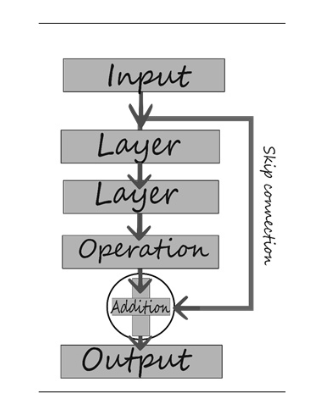

## **Building Custom Layers with the Functional API**

Define a function that takes your input as a tensor and adds ReLu and batch normalization to it:

In [1]:
def relu_batchnorm_layer(input):
  return BatchNormalization()(ReLu)

Build a function for your residual block. You will take a tensor as input and pass it to 2 Conv2D layers. Then add the output of the second Conv2D layer to the original input, which represents the skip connection.

In [2]:
def simple_residual_block(input, filters: int, kernel_size: int=3):

  # add a Conv2D layer with the given number of filters and kernel_size
  int_output = Conv2D(filters = filters,
                      kernel_size = 1,
                      strides = 2,
                      padding = "same")(input)

  # add another Conv2D layer with the given number of filters and a kernel_size of 1
  int_output = Conv2D(filters = filters,
                      kernel_size = 1,
                      strides = 2,
                      padding = "same")(int_output)

  # add the input to the intermediate output
  output = Add()([int_output, input])

  # apply a ReLu activation function followed by batch normalization
  output = relu_batchnorm_layer(output)

  return output

Now, use this custom layer in the model. Define a simple model with a Conv2D layer followed by a residual block:

In [7]:
# define the input shape
inputs = Input(shape=(100, 100, 3))

# set the number of filters
num_filters = 32

# apply batch normalization to the inputs
t = BatchNormalization()(inputs)

# add Conv2D layer
t = Conv2D(kernel_size = 3,
           strides = 1,
           filters = 32,
           padding = "same")(t)

# apply ReLu activation function followed by batch normalization
t = relu_batchnorm_layer(t)

# apply residual block with the given number of filters
t = residual_block(t, filters = num_filters)

# apply average pooling with a pool_size of 4
t = AveragePooling2D(4)(t)

# flatten the output
t = Flatten()(t)

# apply a Dense layer with 1 unit and a sigmoid activation function
outputs = Dense(1, activation = "sigmoid")

# create a model
model = Model(inputs, outputs)

## **Building Custom Layers with Subclassing**

In [2]:
# import necessay libraries
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

Define a Model subclass and the object that you generate from this class are models with 2 dense layers.

In [3]:
# define a Model subclass
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()

    # define a Dense layer with 64 units and a ReLu activation function
    self.dense_1 = Dense(64, activation="relu")

    # define another Dense layer with 10 units and default activation function
    self.dense_2 = Dense(10)

  # define the class logic in call function
  def call(self, inputs):

    # pass the inputs through the 1st Dense layer
    X = self.dense_1(inputs)

    # pass the output of 1st layer to the 2nd Dense layer
    return self.dense_2(X)

Finally, instantiate the model by calling the class.

In [4]:
model = MyModel()

In [6]:
import tensorflow as tf

# call the model on a 1D random input vector with 10 elements
model(tf.random.uniform([1, 10]))

# display the model architecture
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  704       
                                                                 
 dense_1 (Dense)             multiple                  650       
                                                                 
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


Next, modify the call method by including a keyword argument called **training**. This is useful if you want to have different behaviours in training and inference.

In [7]:
# define a Model subclass
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()

    # add a 1st Dense layer with 64 units
    self.dense_1 = Dense(64, activation="relu")

    # add another Dense layer with 10 units
    self.dense_2 = Dense(10)

    # define a Dropout layer with rate of 40% to prevent overfitting
    self.dropout = Dropout(0.4)

  # define the logic in the call method as below
  def call(self, inputs, training=True):

    # pass the inputs to the 1st Dense layer
    X = self.dense_1(inputs)

    # apply Dropout during training
    if training:
      X = self.dropout(X)

    # pass the output to the 2nd Dense layer
    return self.dense_2(X)

Now, instantiate the Model by calling the class above:

In [8]:
model = MyModel()

In [9]:
# call the model on a 1D random input vector with 10 elements
model(tf.random.uniform([1, 10]))

# display the model architecture
model.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             multiple                  704       
                                                                 
 dense_3 (Dense)             multiple                  650       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


--------

--------

### **Building a custom ResNet block with a Conv2D layer, batch normalization layer, & a ReLu activation function to perform binary classificaiton.**

Define the code to upload dataset locally with following code as below:

In [1]:
from google.colab import files
uploaded = files.upload()

Code to delete specific folder from Google Colab:

In [7]:
import os
import shutil
from tqdm import tqdm

# enter folder path you want to delete
folder_path = '/content/pneumonia_or_healthy.zip'

for root, dirs, files in os.walk(folder_path):
    for file in tqdm(files):
        file_path = os.path.join(root, file)
        os.remove(file_path)
shutil.rmtree(folder_path)

NotADirectoryError: ignored

Or, download the specific dataset folder from GitHub to Google Colab with following code:

In [11]:
import requests
from tqdm import tqdm
import os
import zipfile

url = 'https://github.com/PacktWorkshops/The-TensorFlow-Workshop/archive/refs/heads/master.zip'
folder_path = 'The-TensorFlow-Workshop-master/Chapter10/Exercise10.02/pneumonia-or-healthy'
zip_file_name = 'pneumonia-or-healthy.zip'
folder_name = 'pneumonia-or-healthy'

response = requests.get(url, stream=True)

total_size_in_bytes = int(response.headers.get('content-length', 0))
block_size = 1024
progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

with open(zip_file_name, 'wb') as f:
    for data in response.iter_content(block_size):
        progress_bar.update(len(data))
        f.write(data)

progress_bar.close()

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')
    os.rename('/content/' + folder_path, '/content/' + folder_name)

os.remove(zip_file_name)


0.00iB [00:00, ?iB/s]
1.14MiB [00:00, 5.70MiB/s]
2.58MiB [00:00, 8.49MiB/s]
5.18MiB [00:00, 14.6MiB/s]
6.87MiB [00:00, 15.0MiB/s]
8.52MiB [00:00, 15.3MiB/s]
10.2MiB [00:00, 15.8MiB/s]
11.9MiB [00:00, 15.8MiB/s]
13.5MiB [00:00, 15.8MiB/s]
15.1MiB [00:01, 15.8MiB/s]
16.7MiB [00:07, 773kiB/s] 
18.9MiB [00:07, 1.20MiB/s]
22.2MiB [00:07, 2.10MiB/s]
25.7MiB [00:08, 3.34MiB/s]
29.2MiB [00:08, 4.96MiB/s]
32.7MiB [00:08, 6.99MiB/s]
36.2MiB [00:08, 9.49MiB/s]
39.7MiB [00:08, 12.2MiB/s]
43.3MiB [00:08, 15.4MiB/s]
46.9MiB [00:08, 18.5MiB/s]
50.5MiB [00:08, 21.0MiB/s]
54.1MiB [00:08, 23.9MiB/s]
57.8MiB [00:08, 26.2MiB/s]
61.4MiB [00:09, 28.4MiB/s]
65.1MiB [00:09, 29.7MiB/s]
68.8MiB [00:09, 31.0MiB/s]
72.5MiB [00:09, 32.2MiB/s]
76.3MiB [00:09, 32.9MiB/s]
80.1MiB [00:09, 33.5MiB/s]
83.8MiB [00:09, 34.5MiB/s]
87.6MiB [00:09, 34.7MiB/s]
91.4MiB [00:09, 34.8MiB/s]
95.0MiB [00:10, 28.9MiB/s]
98.2MiB [00:10, 29.6MiB/s]
101MiB [00:10, 29.0MiB/s] 
104MiB [00:10, 28.5MiB/s]
107MiB [00:10, 27.7MiB/s]
110MiB 

Unzip the dataset in the current folder

In [12]:
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


Create a directory that contains the path to the dataset:

In [15]:
directory = "/content/pneumonia-or-healthy/"

Load the download the dataset:

In [39]:
# import library
import pathlib

# create path variable that contains the full path to the dataset
path = pathlib.Path(directory)
path

PosixPath('/content/pneumonia-or-healthy')

In [40]:
# create a full paths to training and validation folders
train_dir = path / "training_set"
validation_dir = path / "test_set"

In [41]:
# create a full paths to the healthy and pneumonia folders to training & validation sets
train_healthy_dir = train_dir / "healthy"
train_pneumonia_dir = train_dir / "pneumonia"

validation_healthy_dir = validation_dir / "healthy"
validation_pneumonia_dir = validation_dir / "pneumonia"

Get the total number of images for traning and testing sets:

In [42]:
import os

# total images for training
total_train = len(os.listdir(train_healthy_dir)) + len(os.listdir(train_pneumonia_dir))

# total images for validation
total_val = len(os.listdir(validation_healthy_dir)) + len(os.listdir(validation_pneumonia_dir))

Create **Image Data Generator** for rescaling the images

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# initialize training and validation image data generator for rescaling
train_image_generator = ImageDataGenerator(rescale=1./255)

validation_image_generator = ImageDataGenerator(rescale=1./255)

# define following variables
batch_size = 32
img_height, img_width = 100, 100

In [44]:
# create a data generator for training and validation set
train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    batch_size = batch_size,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

Found 2750 images belonging to 2 classes.
Found 1180 images belonging to 2 classes.


Plot 5 images from training set as sample:

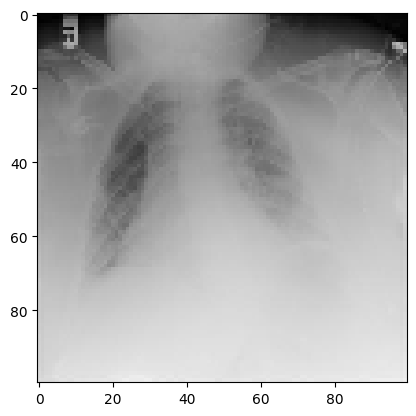

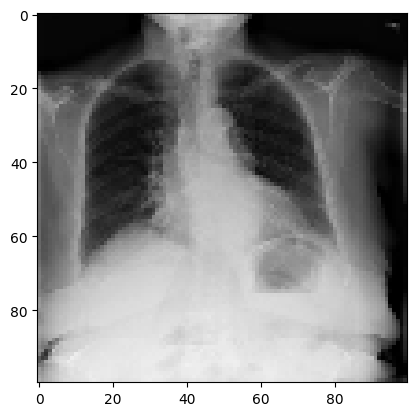

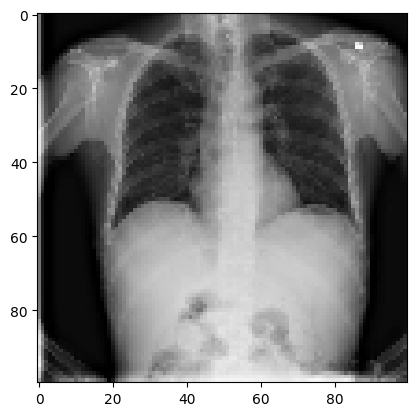

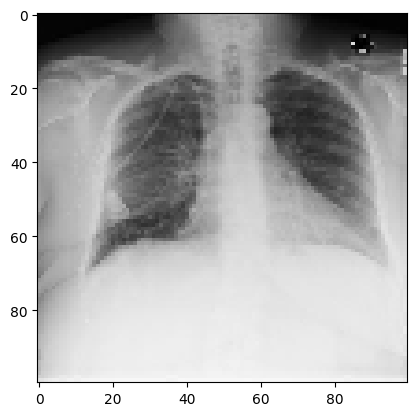

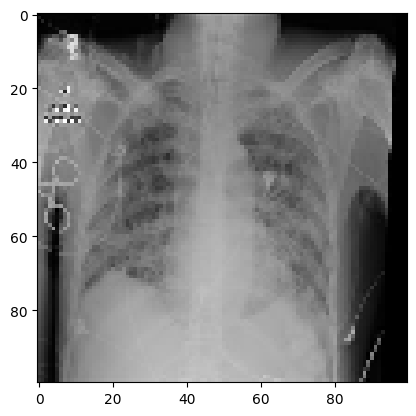

In [45]:
import matplotlib.pyplot as plt

for _ in range(5):
  # get the next image and label for the training data generator
  img, label = train_data_gen.next()

  plt.imshow(img[0])
  plt.show()

**Build a function that takes input as a tensor and adds ReLu and batch normalization to it:**

In [46]:
# import required libraries
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
Add, AveragePooling2D, Flatten, Dense

In [47]:
def relu_batchnorm_layer(input):
  # apply a ReLu activation function followed by batch normalization to the input
  return BatchNormalization()(ReLU()(input))

Create a function to build your **residual block**. You will need to take a tensor (input) as your input and pass it to two **Conv2D** layers with a **stride of 2**. Next, add the input to the output, followed by ReLU and **batch normalization**, returning a tensor. Add another Conv2D layer with **kernel_size=1**. Add its result to the output of the previous Conv2D layer.

In [48]:
def residual_block(input, filters: int, kernel_size: int = 3):
  # add Conv2D layer with given number of filters, kernel_size, strides & padding
  int_output = Conv2D(filters = filters,
                      kernel_size = kernel_size,
                      strides = 2,
                      padding = "same")(input)

  # apply a ReLU activation function followed by batch normalization
  int_output = relu_batchnorm_layer(int_output)

  # add another Conv2D layer with given filter size and kernel size
  int_output = Conv2D(filters = filters,
                      kernel_size = kernel_size,
                      padding = "same")(int_output)

  # add yet another Conv2D with given filter size and kernel size of 1
  int_output2 = Conv2D(filters = filters,
                       kernel_size = 1,
                       strides = 2,
                       padding = "same")(input)

  # add the two intermediate outputs together
  output = Add()([int_output2, int_output])

  # apply a ReLu activation function followed by batch normalizatino
  output = relu_batchnorm_layer(output)

  # return the final output
  return output

Finally, **Build the Final Model Architecture:**

In [54]:
# import Model class
from tensorflow.keras.models import Model

# define the input layer to the model with 
# 100 by 100 pixels of color images
inputs = Input(shape=(100, 100, 3))

In [55]:
# apply batch normalization to the input
t = BatchNormalization()(inputs)

# add Conv2D layer with 32 filters of size (3, 3)
t = Conv2D(filters = 32,
           strides = 1,
           kernel_size = 3,
           padding = "same")(t)

# apply ReLU activation function followed by batch normalization
t = relu_batchnorm_layer(t)

In [56]:
# provide the output of the previous layer to the residual block() function with 32 filters
t = residual_block(t, filters=32)

# pass the output to the Average Pooling layer with 4 units
t = AveragePooling2D(4)(t)

# flatten the output before feeding it to the a fully connected Final layer
t = Flatten()(t)

# feed the flattened to the final output layer with 1 units and sigmoid activation function
outputs = Dense(1, activation="sigmoid")(t)

Instantiate the **Model()** class with the original input and the output of the fully connected layer:

In [57]:
# initialize the Model class with original inputs & fully connected layer's outputs
model = Model(inputs, outputs)

In [58]:
# display the summary of the model architecture
model.summary() 

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_15 (BatchN  (None, 100, 100, 3)  12         ['input_4[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_15 (Conv2D)             (None, 100, 100, 32  896         ['batch_normalization_15[0][0]'] 
                                )                                                           

Compile the model with **binary cross_entropy** as the loss function, **Adam** as the optimizer and **accuracy** as the metric.

In [59]:
# compile the model for training
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

Fit the model to training set and provide the validation set.

In [60]:
history = model.fit(
    # specify the training data generator
    train_data_gen,
    steps_per_epoch = total_train // batch_size,

    # set the number of epochs for training the model
    epochs = 5,

    # specify the validation data generator
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/5
85/85 [==============================] - 24s 98ms/step - loss: 0.5651 - accuracy: 0.7219 - val_loss: 0.6992 - val_accuracy: 0.5026
Epoch 2/5
85/85 [==============================] - 6s 74ms/step - loss: 0.4865 - accuracy: 0.7623 - val_loss: 0.5962 - val_accuracy: 0.6771
Epoch 3/5
85/85 [==============================] - 6s 75ms/step - loss: 0.4677 - accuracy: 0.7811 - val_loss: 0.5587 - val_accuracy: 0.7092
Epoch 4/5
85/85 [==============================] - 8s 89ms/step - loss: 0.4532 - accuracy: 0.7848 - val_loss: 0.5432 - val_accuracy: 0.7214
Epoch 5/5
85/85 [==============================] - 6s 70ms/step - loss: 0.4170 - accuracy: 0.8065 - val_loss: 0.5302 - val_accuracy: 0.7344


------

------

## **Building a Model with Custom Layers and a Custom Loss Function:**

**--> Using ResNet blocks & a Custom Loss Function**

**1. Import the dataset and unzip the file into a local folder.**

Download the specific folder from GitHub to google colab folder and Unzip it:

In [61]:
# Import necessary libraries
import requests
from tqdm import tqdm
import os
import zipfile

# Set the URL to download the zip file from
url = 'https://github.com/PacktWorkshops/The-TensorFlow-Workshop/archive/refs/heads/master.zip'
# Set the path to the folder within the zip file
folder_path = 'The-TensorFlow-Workshop-master/Chapter10/Activity10.01/table-or-glass'
# Set the name for the zip file to be saved as
zip_file_name = 'table-or-glass.zip'
# Set the name for the folder to be extracted
folder_name = 'table-or-glass'

# Send a GET request to the URL and stream the response
response = requests.get(url, stream=True)

# Get the total size of the file in bytes
total_size_in_bytes = int(response.headers.get('content-length', 0))
# Set the block size for reading data from the response
block_size = 1024
# Initialize a progress bar to show download progress
progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

# Open a file with the specified name in write binary mode
with open(zip_file_name, 'wb') as f:
    # Iterate over the content of the response in blocks of specified size
    for data in response.iter_content(block_size):
        # Update the progress bar with the size of the data read
        progress_bar.update(len(data))
        # Write the data to the file
        f.write(data)

# Close the progress bar
progress_bar.close()

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Extract all files from the zip file to a specified directory
    zip_ref.extractall('/content/')
    # Rename a folder within the extracted files to a specified name
    os.rename('/content/' + folder_path, '/content/' + folder_name)

# Remove the zip file after extraction is complete
os.remove(zip_file_name)


0.00iB [00:00, ?iB/s]
1.14MiB [00:00, 5.56MiB/s]
3.32MiB [00:00, 12.2MiB/s]
4.83MiB [00:00, 13.2MiB/s]
6.40MiB [00:00, 14.0MiB/s]
7.97MiB [00:00, 14.5MiB/s]
9.72MiB [00:00, 15.4MiB/s]
11.4MiB [00:00, 15.7MiB/s]
13.0MiB [00:00, 15.6MiB/s]
14.6MiB [00:01, 15.8MiB/s]
16.2MiB [00:07, 763kiB/s] 
18.3MiB [00:07, 1.18MiB/s]
21.2MiB [00:07, 1.95MiB/s]
24.1MiB [00:08, 2.99MiB/s]
27.0MiB [00:08, 4.32MiB/s]
29.9MiB [00:08, 6.00MiB/s]
32.8MiB [00:08, 7.96MiB/s]
35.7MiB [00:08, 10.2MiB/s]
38.6MiB [00:08, 12.8MiB/s]
41.5MiB [00:08, 15.0MiB/s]
44.4MiB [00:08, 17.2MiB/s]
47.3MiB [00:08, 19.5MiB/s]
50.2MiB [00:08, 21.3MiB/s]
53.1MiB [00:09, 22.7MiB/s]
56.0MiB [00:09, 24.0MiB/s]
58.9MiB [00:09, 24.6MiB/s]
61.8MiB [00:09, 25.3MiB/s]
64.8MiB [00:09, 25.7MiB/s]
67.7MiB [00:09, 26.1MiB/s]
70.6MiB [00:09, 26.6MiB/s]
73.5MiB [00:09, 26.7MiB/s]
76.4MiB [00:09, 26.6MiB/s]
79.4MiB [00:10, 26.7MiB/s]
82.3MiB [00:10, 26.8MiB/s]
85.2MiB [00:10, 26.9MiB/s]
88.2MiB [00:10, 27.0MiB/s]
91.1MiB [00:10, 27.2MiB/s]
94.0M

Unzip the folder in the currrent folder

In [62]:
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [65]:
# Import necessary libraries
import numpy as np
import pandas as pd
import pathlib
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

Create a directory for the paths to the dataset

In [63]:
import pathlib

directory = "/content/table-or-glass"

# create a full paths to the dataset
path = pathlib.Path(directory)
path

PosixPath('/content/table-or-glass')

**2. Create the list of images for both the training and testing sets.**

In [66]:
# create full paths to the train and validations folders
train_dir = path / "training_set"
validation_dir = path / "test_set"

In [67]:
# create full pathsto the glass and table folders for both training and validation sets
train_table_dir = train_dir / "table"
train_glass_dir = train_dir / "glass"

validation_table_dir = validation_dir / "table"
validation_glass_dir = validation_dir / "glass"

Total number of images for training and validation sets:

In [68]:
import os

# get the total number of training images
total_train = len(os.listdir(train_table_dir)) + len(os.listdir(train_glass_dir))

# get the total number of testing images
total_val = len(os.listdir(validation_table_dir)) + len(os.listdir(validation_glass_dir))

Display a barchar with total number of images of glasses and tables:

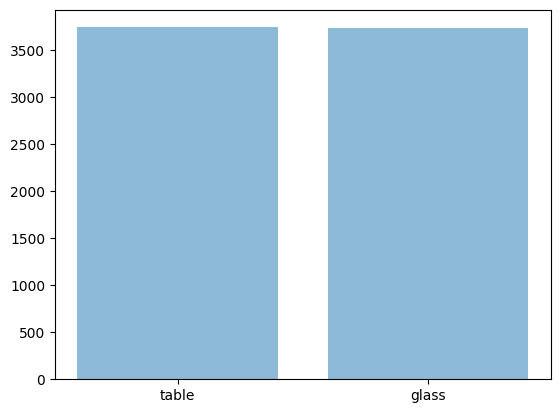

In [69]:
# Count the number of training images for tables
num_train_table = len([f for f in os.listdir(train_table_dir) if os.path.isfile(os.path.join(train_table_dir, f))])
# Count the number of training images for glasses
num_train_glass = len([f for f in os.listdir(train_glass_dir) if os.path.isfile(os.path.join(train_glass_dir, f))])
# Count the number of validation images for tables
num_validation_table = len([f for f in os.listdir(validation_table_dir) if os.path.isfile(os.path.join(validation_table_dir, f))])
# Count the number of validation images for glasses
num_validation_glass = len([f for f in os.listdir(validation_glass_dir) if os.path.isfile(os.path.join(validation_glass_dir, f))])


# Create a bar plot using the specified data
plt.bar(['table', 'glass'],
        [num_train_table + num_validation_table,
         num_train_glass + num_validation_glass],
        align='center',
        alpha=0.5)

# Display the plot
plt.show()

**3. Preprocess the images (standardization and reshaping).**

Initialize the training and testing data generator for rescaling:

In [70]:
# define generator for image rescaling
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# define following variables
batch_size = 32
img_height, img_width = 100, 100

In [71]:
# create a data generator for both training and validation sets
train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    batch_size = batch_size,
    shuffle = True,
    target_size = (img_height, img_width),
    class_mode = "binary"
)

Found 5236 images belonging to 2 classes.
Found 2247 images belonging to 2 classes.


**4. Create a custom loss function that will calculate the average squared error.**

In [73]:
# define custom loss function to calculate mean_squared_error
def custom_loss_function(y_true, y_pred):

  # calculate squared diff b/w true and predicted values
  squared_diff = tf.square(float(y_true) -float(y_pred))

  # calculate the mean of the squared differences along the last axis
  return tf.reduce_mean(squared_diff, axis=-1)

**5. Create a custom residual block constructor function.**

Build the function that takes input as tensor and adds ReLU activation and batch normalization to it:

In [74]:
def relu_batchnorm_layer(input):

  # add ReLU activation followed by batch normalization
  return BatchNormalization()(ReLU()(input))

Create a function to build the **residual block**. You will need to take a tensor as your input and pass it to two Conv2D layers. <br>

Next, add the input to the output, followed by ReLU and batch normalization.
Since you used an Add layer for the skip connection in your residual_block, you need to make sure that its inputs are always of the same shape. 

In [75]:
def residual_block(input, downsample: bool, filters: int, kernel_size: int = 3):
    """
    Create a residual block with the specified parameters.

    :param input: tensor of input data
    :param downsample: boolean indicating whether to downsample the input
    :param filters: number of filters for the convolutional layers
    :param kernel_size: size of the kernel for the convolutional layers
    :return: tensor of output data
    """
    # Apply a 2D convolutional layer with the specified parameters
    int_output = Conv2D(filters=filters, kernel_size=kernel_size,
                        strides=(1 if not downsample else 2),
                        padding="same")(input)

    # Apply a ReLU activation function followed by batch normalization
    int_output = relu_batchnorm_layer(int_output)
    
    # Apply another 2D convolutional layer with the specified parameters
    int_output = Conv2D(filters=filters, kernel_size=kernel_size,
                        padding="same")(int_output)

    # If downsampling is specified
    if downsample:
        # Apply a 2D convolutional layer with a stride of 2 to downsample the input
        int_output2 = Conv2D(filters=filters, kernel_size=1, strides=2,
                             padding="same")(input)
        # Add the output of the previous layer to the downsampled input
        output = Add()([int_output2, int_output])
    else:
        # Add the output of the previous layer to the original input
        output = Add()([input, int_output])

    # Apply a ReLU activation function followed by batch normalization
    output = relu_batchnorm_layer(output)

    return output

Define the Input layer of the model. <br>
Create the model with custom architecture. <br>
Finally, reference your input and output tensors with **model = Model(inputs, outputs)**

In [76]:
# Set the shape of the input data
inputs = Input(shape=(100, 100, 3))
# Set the initial number of filters for the convolutional layers
num_filters = 32

# Apply batch normalization to the input data
t = BatchNormalization()(inputs)

# Apply a 2D convolutional layer with the specified parameters
t = Conv2D(kernel_size=3,
           strides=1,
           filters=32,
           padding="same")(t)

# Apply a ReLU activation function followed by batch normalization
t = relu_batchnorm_layer(t)

# Set the number of residual blocks for each group of blocks
num_blocks_list = [1, 3, 5, 6, 1]
# Iterate over each group of blocks
for i in range(len(num_blocks_list)):
    # Get the number of blocks for the current group
    num_blocks = num_blocks_list[i]
    # Iterate over each block in the current group
    for j in range(num_blocks):
        # Apply a residual block with the specified parameters
        t = residual_block(t, downsample=(j == 0 and i != 0), filters=num_filters)
    # Double the number of filters for the next group of blocks
    num_filters *= 2

# Apply average pooling with a pool size of 4
t = AveragePooling2D(4)(t)

# Flatten the output of the previous layer
t = Flatten()(t)

# Apply a final Dense layer with a sigmoid activation function
outputs = Dense(1, activation='sigmoid')(t)

# Create a model with the specified inputs and outputs
model = Model(inputs, outputs)

In [77]:
# display the model architecture of the model
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_19 (BatchN  (None, 100, 100, 3)  12         ['input_5[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv2d_19 (Conv2D)             (None, 100, 100, 32  896         ['batch_normalization_19[0][0]'] 
                                )                                                           

**6. Train the model.**

Compile this model by providing your custom loss function, using Adam as the optimizer and accuracy as the metric to be displayed:

In [78]:
model.compile(
    optimizer = "adam",
    loss = custom_loss_function,
    metrics = ["accuracy"]
)

Fit the model to the training and validation dataset:

In [79]:
history = model.fit(
    # specify the training data generator
    train_data_gen,
    steps_per_epoch = total_train // batch_size,

    # specify the epochs to train the model for
    epochs = 5,

    # specify the validation data generator
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

Epoch 1/5
163/163 [==============================] - 61s 210ms/step - loss: 0.2737 - accuracy: 0.6751 - val_loss: 0.5009 - val_accuracy: 0.4991
Epoch 2/5
163/163 [==============================] - 31s 189ms/step - loss: 0.1341 - accuracy: 0.8184 - val_loss: 0.4402 - val_accuracy: 0.5188
Epoch 3/5
163/163 [==============================] - 31s 193ms/step - loss: 0.1120 - accuracy: 0.8513 - val_loss: 0.1738 - val_accuracy: 0.8000
Epoch 4/5
163/163 [==============================] - 30s 187ms/step - loss: 0.1008 - accuracy: 0.8645 - val_loss: 0.1113 - val_accuracy: 0.8571
Epoch 5/5
163/163 [==============================] - 32s 194ms/step - loss: 0.0817 - accuracy: 0.8918 - val_loss: 0.1035 - val_accuracy: 0.8737


**7. Print the learning curves for accuracy and loss.**

Plot your training and validation accuracy:

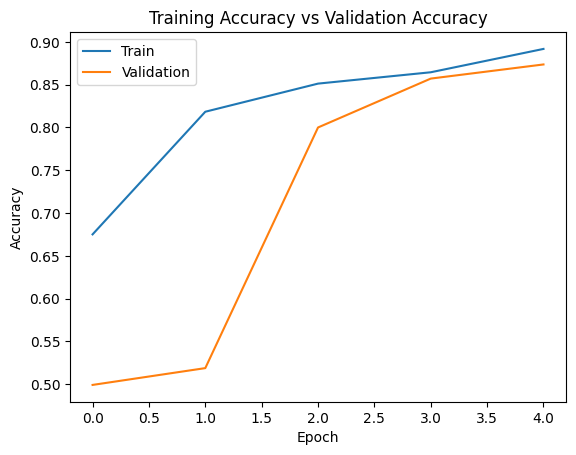

In [80]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])

# Plot the validation accuracy
plt.plot(history.history['val_accuracy'])

# Set the title for the plot
plt.title('Training Accuracy vs Validation Accuracy')
# Set the label for the y-axis
plt.ylabel('Accuracy')
# Set the label for the x-axis
plt.xlabel('Epoch')

# Add a legend to the plot
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plot
plt.show()

Plot your training and validation loss:

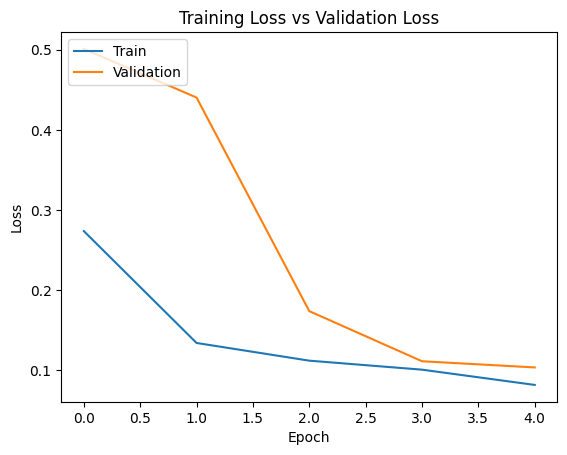

In [81]:
# Plot the training loss
plt.plot(history.history['loss'])

# Plot the validation loss
plt.plot(history.history['val_loss'])

# Set the title for the plot
plt.title('Training Loss vs Validation Loss')
# Set the label for the y-axis
plt.ylabel('Loss')
# Set the label for the x-axis
plt.xlabel('Epoch')

# Add a legend to the plot
plt.legend(['Train', 'Validation'], loc='upper left')

# Display the plot
plt.show()

---------

---------

---------